In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import random
import math
from keras.regularizers import l1, l2
from keras.regularizers import l1_l2
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
FF_df = pd.read_csv('form_factors.csv')
TD_x_df = pd.read_csv('gpr_total_density_x_200.csv')
TD_y_df = pd.read_csv('gpr_total_density_y_200.csv')

FF_df = FF_df.transpose()
TD_x_df = TD_x_df.transpose()
TD_y_df = TD_y_df.transpose()

In [3]:
for i in range(0,613):
    TD_y_df[i] = TD_y_df[i]-round((TD_y_df[i][0]+TD_y_df[i][199])/2,3)

In [4]:
FF_df = (FF_df-FF_df.mean())/FF_df.std()
TD_x_df = (TD_x_df-TD_x_df.mean())/TD_x_df.std()
TD_y_df = (TD_y_df-TD_y_df.mean())/TD_y_df.std()

In [83]:
FF = np.genfromtxt('form_factors.csv', delimiter=',', skip_header=1).T
TD_x = np.genfromtxt('gpr_total_density_x_200.csv', delimiter=',', skip_header=1).T
TD_y = np.genfromtxt('gpr_total_density_y_200.csv', delimiter=',', skip_header=1).T
print(FF.shape)
print(TD_x.shape)
print(TD_y.shape)

(1000, 613)
(200, 613)
(200, 613)


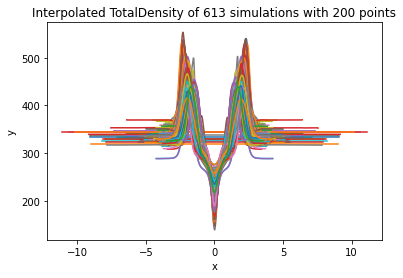

In [84]:
i = 0
for index in range(0,TD_x.shape[1]):
    plt.plot(TD_x[:,index],TD_y[:,index])
    i = i + 1
    
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolated TotalDensity of ' + str(i) + ' simulations with 200 points')
plt.show()

In [85]:
for i in range(0,613):
    TD_y[:,i] = TD_y[:,i]-round((TD_y[0,i]+TD_y[199,i])/2,3)

In [86]:
FF = (FF-np.mean(FF, axis=0))/(np.std(FF, axis=0))
TD_x = (TD_x-np.mean(TD_x, axis=0))/(np.std(TD_x, axis=0))
TD_y = (TD_y-np.mean(TD_y, axis=0))/(np.std(TD_y, axis=0))

In [77]:
FF[:,0]

array([ 9.81211227e-01,  9.80520834e-01,  9.78450003e-01,  9.74999781e-01,
        9.70171914e-01,  9.63968841e-01,  9.56393698e-01,  9.47450316e-01,
        9.37143215e-01,  9.25477604e-01,  9.12459379e-01,  8.98095118e-01,
        8.82392079e-01,  8.65358196e-01,  8.47002072e-01,  8.27332977e-01,
        8.06360844e-01,  7.84096259e-01,  7.60550461e-01,  7.35735330e-01,
        7.09663388e-01,  6.82347784e-01,  6.53802291e-01,  6.24041301e-01,
        5.93079812e-01,  5.60933422e-01,  5.27618324e-01,  4.93151290e-01,
        4.57549669e-01,  4.20831374e-01,  3.83014872e-01,  3.44119178e-01,
        3.04163837e-01,  2.63168924e-01,  2.21155022e-01,  1.78143221e-01,
        1.34155099e-01,  8.92127146e-02,  4.33385951e-02, -3.44427787e-03,
       -5.11124786e-02, -9.96421502e-02, -1.49009018e-01, -1.99188399e-01,
       -2.50155221e-01, -3.01884027e-01, -3.54348994e-01, -4.07523939e-01,
       -4.61382332e-01, -5.15897295e-01, -5.71041595e-01, -6.26787589e-01,
       -6.83107029e-01, -

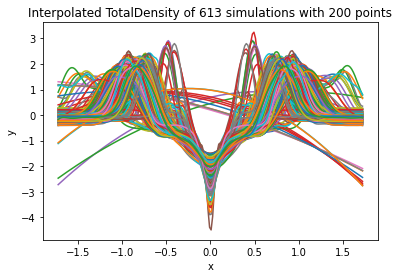

In [87]:
i = 0
for index in range(0,TD_x.shape[1]):
    plt.plot(TD_x[:,index],TD_y[:,index])
    i = i + 1
    
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolated TotalDensity of ' + str(i) + ' simulations with 200 points')
plt.show()

In [94]:
outlier_column_indexes = set([])

index = 0
for value in TD_y[99,:]:
    if value > -1:
        outlier_column_indexes.add(index)
#        print(index)
    index = index + 1
    
#print('')
index = 0 
for value in TD_y[5,:]:
    if value > 0.30:
        outlier_column_indexes.add(index)
#        print(index)
    index = index + 1

#print('')
index = 0 
for value in TD_y[15,:]:
    if value > 0.30:
        outlier_column_indexes.add(index)
#        print(index)
    index = index + 1

print(outlier_column_indexes)
print(len(outlier_column_indexes))

{387, 261, 10, 16, 277, 24, 32, 34, 419, 37, 551, 43, 430, 303, 311, 583, 78, 82, 89, 221, 353, 364, 118, 252}
24


In [96]:
FF = np.delete(FF, list(outlier_column_indexes), axis=1)
TD_x = np.delete(TD_x, list(outlier_column_indexes), axis=1)
TD_y = np.delete(TD_y, list(outlier_column_indexes), axis=1)

In [98]:
print(FF.shape)
print(TD_x.shape)
print(TD_y.shape)
FF

(1000, 589)
(200, 589)
(200, 589)


array([[ 0.98121123, -0.44447859,  0.18685446, ..., -0.42810808,
         0.67266463, -0.10560854],
       [ 0.98052083, -0.44492628,  0.18637685, ..., -0.42853778,
         0.67203935, -0.10597731],
       [ 0.97845   , -0.44626914,  0.18494421, ..., -0.42982671,
         0.67016382, -0.10708351],
       ...,
       [-0.6371722 , -0.76245943, -0.77374727, ..., -0.76102048,
        -0.64097375, -0.74967765],
       [-0.63673313, -0.76200665, -0.77281112, ..., -0.7607179 ,
        -0.64095518, -0.74930705],
       [-0.63635644, -0.76156071, -0.7718811 , ..., -0.76037462,
        -0.64093707, -0.74897018]])

In [99]:
for i in range(0,TD_y.shape[1]):
    TD_y[:,i] = TD_y[:,i]-round((TD_y[0,i]+TD_y[199,i])/2,3)

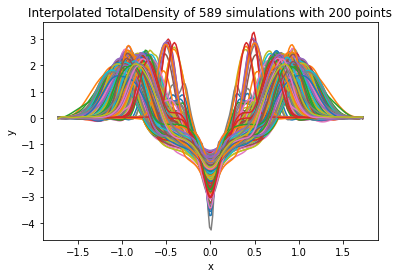

In [100]:
i = 0
for index in range(0,TD_x.shape[1]):
    plt.plot(TD_x[:,index],TD_y[:,index])
    i = i + 1
    
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolated TotalDensity of ' + str(i) + ' simulations with 200 points')
plt.show()

In [104]:
input_data = FF[: , :-14]
output_data_x = TD_x[: , :-14]
output_data_y = TD_y[: , :-14]
print(input_data.shape)
print(output_data_x.shape)
print(output_data_y.shape)

(1000, 575)
(200, 575)
(200, 575)


In [110]:
random.seed(42)
train = random.sample(range(0,input_data.shape[1]),int(input_data.shape[1]*0.8))
test = []
for number in range(0,input_data.shape[1]):
    if not number in train:
        test.append(number)

print(train)
print(len(train))
print(test)
print(len(test))

[114, 25, 281, 250, 228, 142, 104, 558, 89, 432, 32, 30, 95, 223, 238, 517, 27, 203, 429, 225, 459, 284, 6, 163, 565, 348, 553, 159, 220, 344, 568, 94, 389, 99, 367, 352, 270, 44, 470, 127, 387, 80, 300, 370, 196, 71, 46, 233, 296, 81, 560, 103, 542, 548, 464, 373, 166, 379, 363, 214, 273, 73, 175, 571, 83, 236, 194, 138, 506, 473, 327, 539, 285, 112, 350, 518, 431, 393, 397, 28, 117, 420, 16, 412, 161, 205, 137, 33, 108, 467, 482, 290, 448, 540, 490, 486, 335, 255, 202, 452, 468, 329, 234, 513, 135, 529, 126, 381, 287, 275, 134, 382, 299, 219, 554, 298, 204, 185, 501, 70, 260, 252, 528, 386, 24, 440, 56, 78, 321, 525, 405, 549, 216, 305, 564, 197, 195, 441, 239, 538, 128, 283, 5, 443, 369, 58, 349, 274, 384, 136, 497, 328, 174, 57, 150, 222, 533, 232, 1, 430, 368, 520, 256, 390, 91, 259, 54, 320, 152, 504, 409, 311, 101, 447, 191, 411, 82, 276, 271, 0, 306, 165, 511, 9, 421, 457, 157, 122, 29, 123, 483, 40, 43, 374, 248, 35, 272, 64, 65, 337, 243, 572, 84, 536, 435, 310, 442, 479, 496

In [111]:
train_input_values = []
for number in train:
    train_input_values.append(input_data[:,number])
    
train_output_values = []
for number in train:
    train_output_values.append(np.concatenate((output_data_x[:,number],output_data_y[:,number])))

test_input_values = []
for number in test:
    test_input_values.append(input_data[:,number])
    
test_output_values = []
for number in test:
    test_output_values.append(np.concatenate((output_data_x[:,number],output_data_y[:,number])))
    
train_input_values = np.array(train_input_values).astype(np.float32)
train_output_values = np.array(train_output_values).astype(np.float32)
test_input_values = np.array(test_input_values).astype(np.float32)
test_output_values = np.array(test_output_values).astype(np.float32)

print(train_input_values.shape)
print(train_output_values.shape)
print(test_input_values.shape)
print(test_output_values.shape)

(460, 1000)
(460, 400)
(115, 1000)
(115, 400)


In [112]:
def loss(actual,prediction):
    length = int(len(prediction[0])/2)
    
    index = 0
    distance_average_sum = 0
    for data in prediction:
        p_x = data[0:length]
        p_y = data[length:]
        t_x = actual[index][0:length]
        t_y = actual[index][length:]
         
        distance_sum = 0
        for i in range(0,length):
            distance_sum = distance_sum + math.sqrt((t_x[i]-p_x[i])**2 + (t_y[i]-p_y[i])**2)
            
        distance_average_sum = distance_average_sum + distance_sum/length
        index = index + 1
        
    return (distance_average_sum)/len(prediction)

def plots(actual,prediction):
    random.seed(42)
    train = random.sample(range(0,len(test_input_values)),10)
    for number in train:
        length = int(len(prediction[0])/2)
        x_1 = prediction[number][0:length]
        y_1 = prediction[number][length:]
        plt.plot(x_1,y_1,c='b')

        x_2 = test_output_values[number][0:length]
        y_2 = test_output_values[number][length:]
        plt.plot(x_2,y_2,c='r')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Output curve of the ten random predictions |blue| against actual |red|')
    plt.show() 
    
    index = 0
    for points in prediction:
        p_x = points[0:length]
        p_y = points[length:]
        plt.scatter(p_x,p_y,c='b', label='Prediction', alpha=0.25)
        t_x = test_output_values[index][0:length].tolist()
        t_y = test_output_values[index][length:].tolist()
        plt.scatter(t_x,t_y,c='r', label = 'Actual', alpha=0.50)
        index = index + 1

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Output scatterplot of prediction |blue| and actual |red| data')
    plt.show()
    
    number = 10
    length = int(len(prediction[0])/2)
    x_1 = prediction[number][0:length]
    y_1 = prediction[number][length:]
    plt.plot(x_1,y_1,c='b')

    x_2 = actual[number][0:length]
    y_2 = actual[number][length:]
    plt.plot(x_2,y_2,c='r')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Output curve of simulation ' + str(number) + ' with predictions |blue| against actual |red|')
    plt.show() 
    
    number = 75
    length = int(len(prediction[0])/2)
    x_1 = prediction[number][0:length]
    y_1 = prediction[number][length:]
    plt.plot(x_1,y_1,c='b')

    x_2 = actual[number][0:length]
    y_2 = actual[number][length:]
    plt.plot(x_2,y_2,c='r')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Output curve of simulation ' + str(number) + ' with predictions |blue| against actual |red|')
    plt.show() 
    
    number = 80
    prediction = model.predict(test_input_values)
    length = int(len(prediction[0])/2)
    x_1 = prediction[number][0:length]
    y_1 = prediction[number][length:]
    plt.plot(x_1,y_1,c='b')

    x_2 = actual[number][0:length]
    y_2 = actual[number][length:]
    plt.plot(x_2,y_2,c='r')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Output curve of simulation ' + str(number) + ' with predictions |blue| against actual |red|')
    plt.show()

In [114]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(2000, activation="relu")(inputs)
x = layers.Dropout(0.20, seed=42)(x)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dropout(0.20, seed=42)(x)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dropout(0.20, seed=42)(x)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dropout(0.20, seed=42)(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mean_absolute_error')
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=150)]

model.fit(train_input_values, train_output_values, batch_size=46, epochs=1500, validation_split=0.2)
print('')
print('Loss is:' + str(loss(test_output_values, model.predict(test_input_values))))
print('')
plots(test_output_values,model.predict(test_input_values))

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1000)]            0         
_________________________________________________________________
dense_5 (Dense)              (None, 2000)              2002000   
_________________________________________________________________
dropout_4 (Dropout)          (None, 2000)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 2000)              4002000   
_________________________________________________________________
dropout_5 (Dropout)          (None, 2000)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 2000)              4002000   
_________________________________________________________________
dropout_6 (Dropout)          (None, 2000)              0   

AttributeError: module 'pandas' has no attribute 'core'